<a href="https://colab.research.google.com/github/pavass/bold_nonBold_binary_imageClassification/blob/main/bold_heading_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install split-folders
import splitfolders
input_folder = '/content/gdrive/MyDrive/datasets/input_images'
output = '/content/gdrive/MyDrive/datasets/preprocessed_data'
splitfolders.ratio(input_folder, output,seed=42,ratio=(.8, .2))

Copying files: 200 files [01:56,  1.72 files/s]


In [3]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
#from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
#from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img_height, img_width = (224,224)
batch_size = 32

train_data_dir = r'/content/gdrive/MyDrive/datasets/preprocessed_data/train'
valid_data_dir = r'/content/gdrive/MyDrive/datasets/preprocessed_data/val'
test_data_dir = r'/content/gdrive/MyDrive/datasets/preprocessed_data/test'

In [11]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  validation_split=0.5)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_height, img_width),
                                                   batch_size= batch_size,
                                                   class_mode='categorical',
                                                   subset='training')
valid_generator = train_datagen.flow_from_directory(valid_data_dir,
                                                   target_size=(img_height, img_width),
                                                   batch_size= batch_size,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [12]:
test_generator = train_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_height, img_width),
                                                  batch_size= 1,
                                                  class_mode='categorical',
                                                  subset='validation')

Found 10 images belonging to 2 classes.


In [13]:
#base_model = VGG16(include_top=False, weights='imagenet')
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs= base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs = 10)

94781440/94765736 [==============================] - 1s 0us/step
Epoch 1/10
3/3 [==============================] - 17s 5s/step - loss: 7.6015 - accuracy: 0.4750
Epoch 2/10
3/3 [==============================] - 13s 5s/step - loss: 1.6739 - accuracy: 0.6250
Epoch 3/10
3/3 [==============================] - 13s 4s/step - loss: 0.9260 - accuracy: 0.7875
Epoch 4/10
3/3 [==============================] - 13s 5s/step - loss: 0.4621 - accuracy: 0.9125
Epoch 5/10
3/3 [==============================] - 13s 4s/step - loss: 0.5523 - accuracy: 0.8500
Epoch 6/10
3/3 [==============================] - 13s 4s/step - loss: 0.3730 - accuracy: 0.9250
Epoch 7/10
3/3 [==============================] - 14s 4s/step - loss: 0.4211 - accuracy: 0.9125
Epoch 8/10
3/3 [==============================] - 13s 4s/step - loss: 0.3396 - accuracy: 0.9375
Epoch 9/10
3/3 [==============================] - 13s 5s/step - loss: 0.2070 - accuracy: 0.9375
Epoch 10/10
3/3 [==============================] - 13s 5s/step - loss: 

In [14]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [1]:
#model.save(r'/content/gdrive/MyDrive/datasets/VGG16_classification.h5')
model.save(r'C:/Users/pavas.srivastava/OneDrive - Accenture/Desktop/input_images1')

NameError: ignored

In [1]:
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

print('\nTest Accuracy: ', test_acc)

NameError: ignored

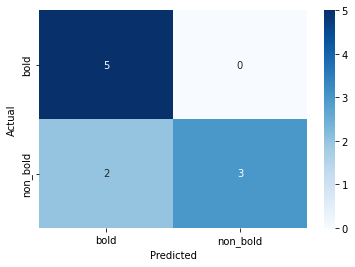

test_accuracy : 80.0


In [17]:
import pandas as pd
import seaborn as sns
import tensorflow as tf

model = tf.keras.models.load_model(r'/content/gdrive/MyDrive/datasets/ResNet50_classification.h5')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob = []
y_act = []
test_generator.reset()

for _ in range(nb_samples):
    x_test, y_test = test_generator.next()
    y_prob.append(model.predict(x_test))
    y_act.append(y_test)
    
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, cmap='Blues',annot=True, fmt='d')
plt.show()
print('test_accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [19]:
model = tf.keras.models.load_model(r'/content/gdrive/MyDrive/datasets/ResNet50_classification.h5')

In [20]:
from tensorflow.keras.preprocessing import image
img_path = (r'/content/gdrive/MyDrive/datasets/preprocessed_data/test/non_bold/Capture2.JPG')
img = image.load_img(img_path, target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


In [21]:
preds = model.predict(x)

In [22]:
preds

array([[0.22207029, 0.7779298 ]], dtype=float32)

In [30]:
#